In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
df = pd.read_csv('F:\\ML\\iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [108]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [110]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

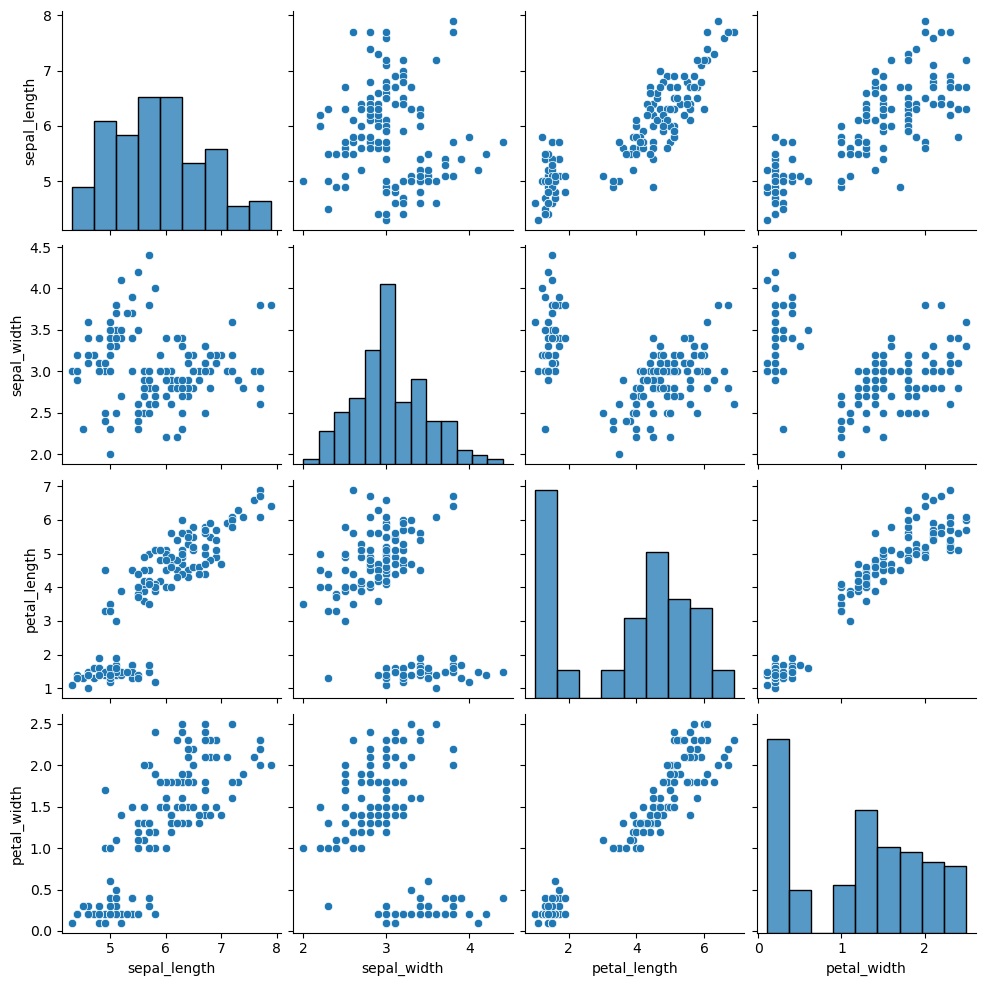

In [169]:
sns.pairplot(df)

<Axes: >

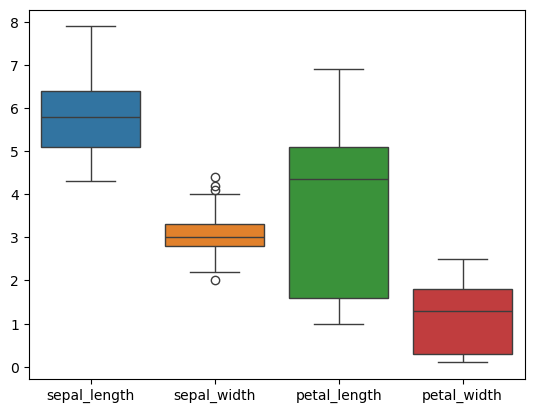

In [112]:
sns.boxplot(df)

In [116]:
from sklearn.preprocessing import LabelEncoder

In [118]:
encoder = LabelEncoder()

In [122]:
encoded_data = encoder.fit_transform(df['species'])

In [126]:
encoded_df = pd.DataFrame(encoded_data)
encoded_df.value_counts()

0
0    50
1    50
2    50
Name: count, dtype: int64

In [132]:
final_df = pd.concat([df,encoded_df],axis=1)
final_df.rename(columns={0:'species_0'},inplace=True)

In [136]:
final_df.drop('species',axis=1,inplace=True)

In [138]:
final_df

,sepal_length,sepal_width,petal_length,petal_width,species_0
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


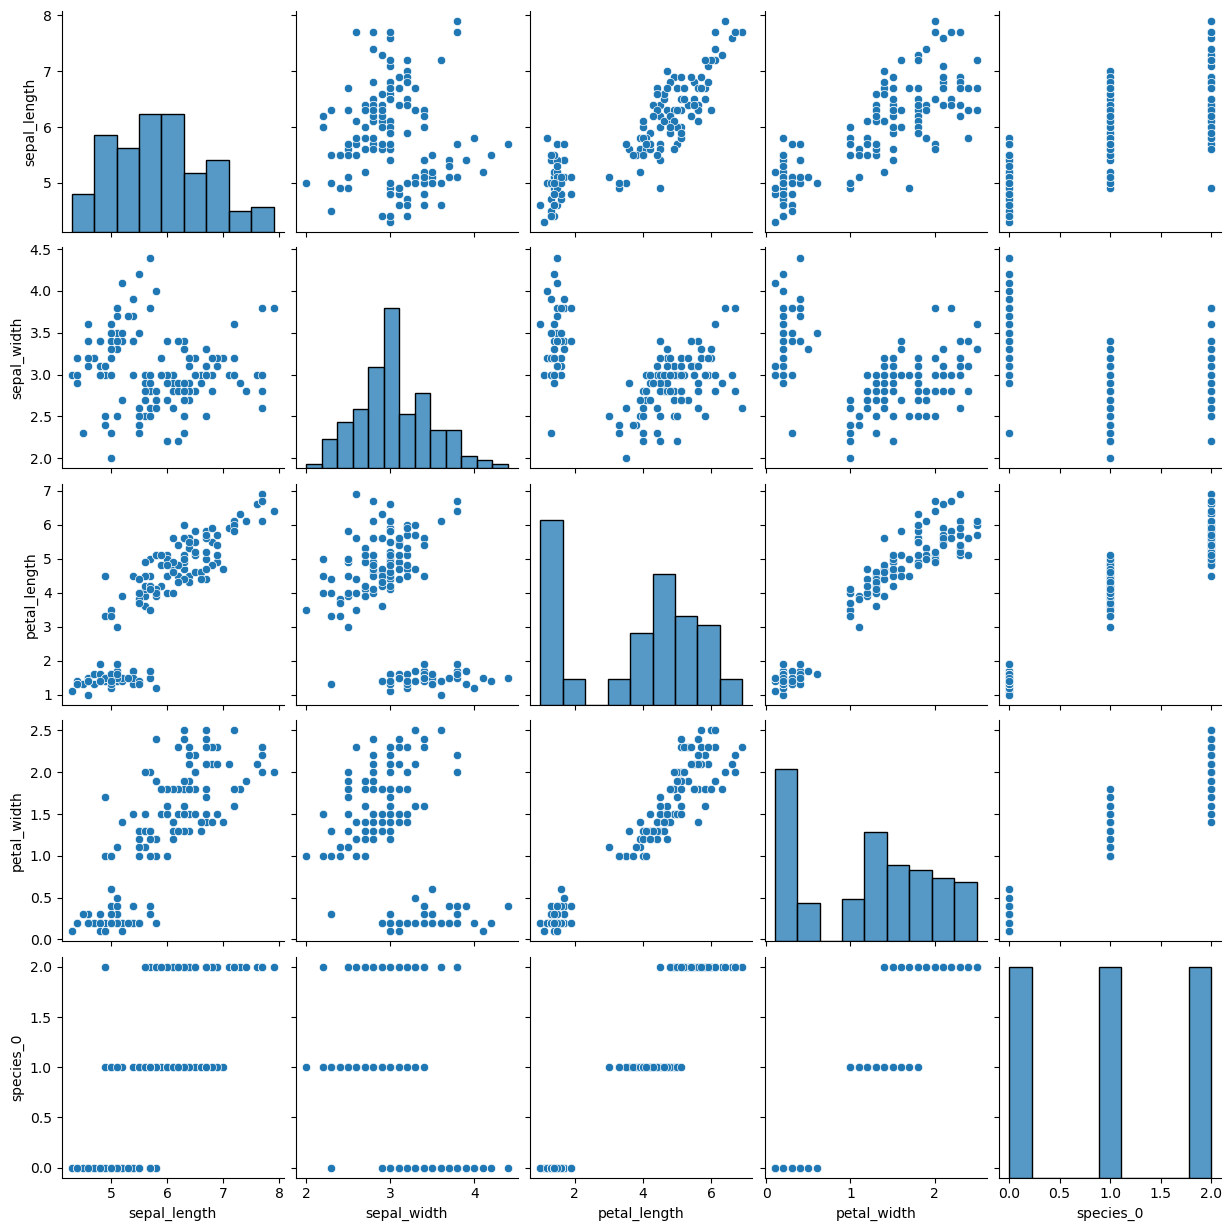

In [171]:
sns.pairplot(final_df)

In [152]:
X = final_df[['sepal_length','sepal_width','petal_length','petal_width']]
y = final_df['species_0']

In [187]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [175]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [181]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [183]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled,y_train)

LogisticRegression()

In [185]:
y_pred = log_model.predict(X_test_scaled)

In [189]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [193]:
y_pred1 = log_model.predict(X_train_scaled) # Testing model on Train Dataset to check overfitting

In [195]:
print(classification_report(y_train,y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.97      0.92      0.95        39
           2       0.93      0.97      0.95        38

    accuracy                           0.96       112
   macro avg       0.97      0.97      0.97       112
weighted avg       0.97      0.96      0.96       112

